In [42]:
from tensorflow.keras.layers import Dense, Input, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Model



In [43]:
def get_model():
    input = Input(shape = (28,28,1))
    x = Conv2D(32, (3,3), strides = (1,1), activation = 'relu', padding = 'same')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3,3), strides = (1,1), activation = 'relu', padding = 'same')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(64, activation = 'relu')(x)
    output = Dense(10, activation = 'softmax')(x)

    model = Model(input, output, name = 'cnn_model')
    model.compile( loss = 'categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy']
                 )
    return model

In [44]:
model = get_model()
model.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
def get_normal_dataset():
    (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
    xtrain = xtrain.astype('float32') / 255.0
    xtest = xtest.astype('float32') / 255.0
    xtrain = xtrain.reshape(xtrain.shape[0], 28,28,1)
    xtest = xtest.reshape(xtest.shape[0], 28,28,1)
        
    ytrain = to_categorical(ytrain)
    ytest = to_categorical(ytest)
    
    xtrain , xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.166666, random_state = 42)
    

    
    return (xtrain, ytrain), (xtest, ytest), (xval, yval)

In [57]:
(xtrain, ytrain), (xtest, ytest), (xval, yval) = get_normal_dataset()

In [73]:
import matplotlib.pyplot as plt
import numpy as np
def print_image(x, y, title = "image"):
    # x = xtrain[:9]
    # y = ytrain[:9]
    
    plt.figure(figsize = (10,10))
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(x[i], cmap = 'gray')
        plt.title("label : " + str(np.argmax(y[i])))
        plt.axis('off')
    
    plt.suptitle(title)
    plt.show()

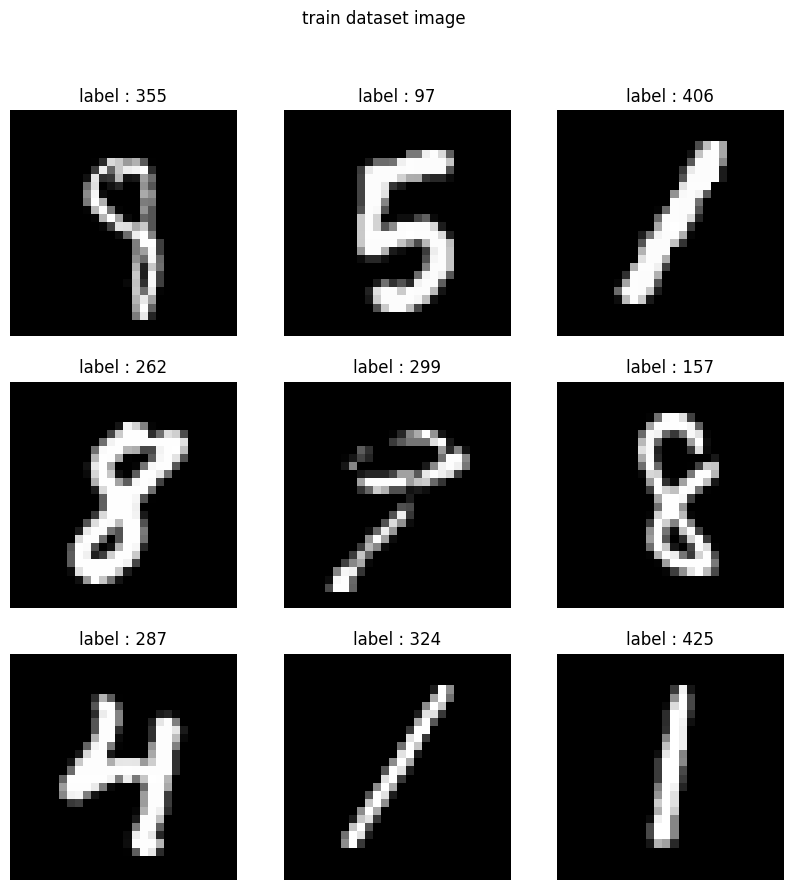

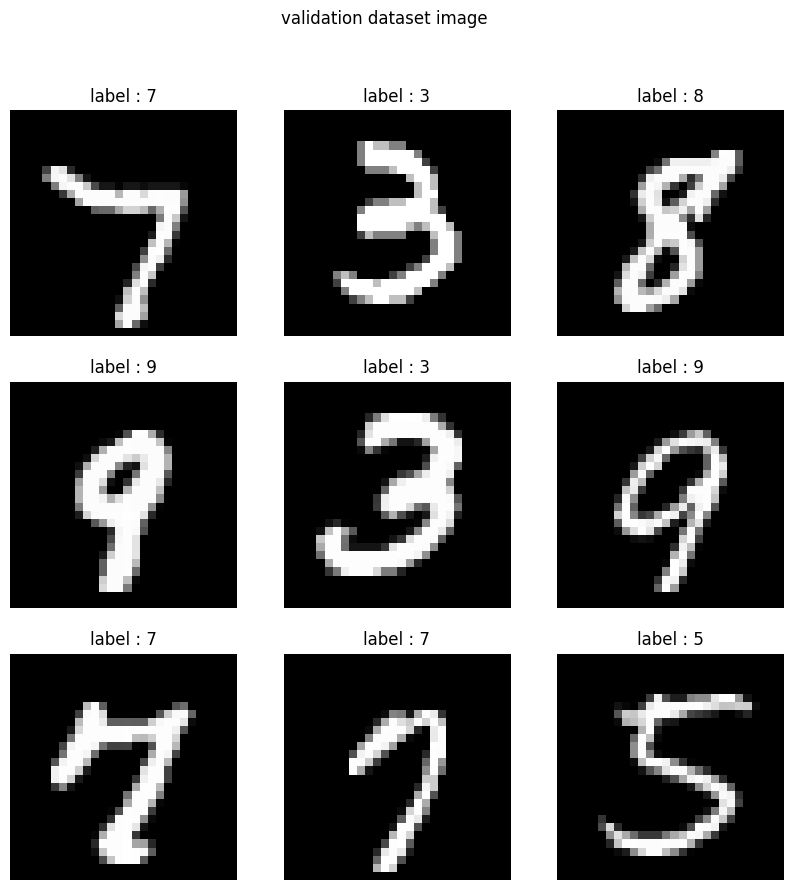

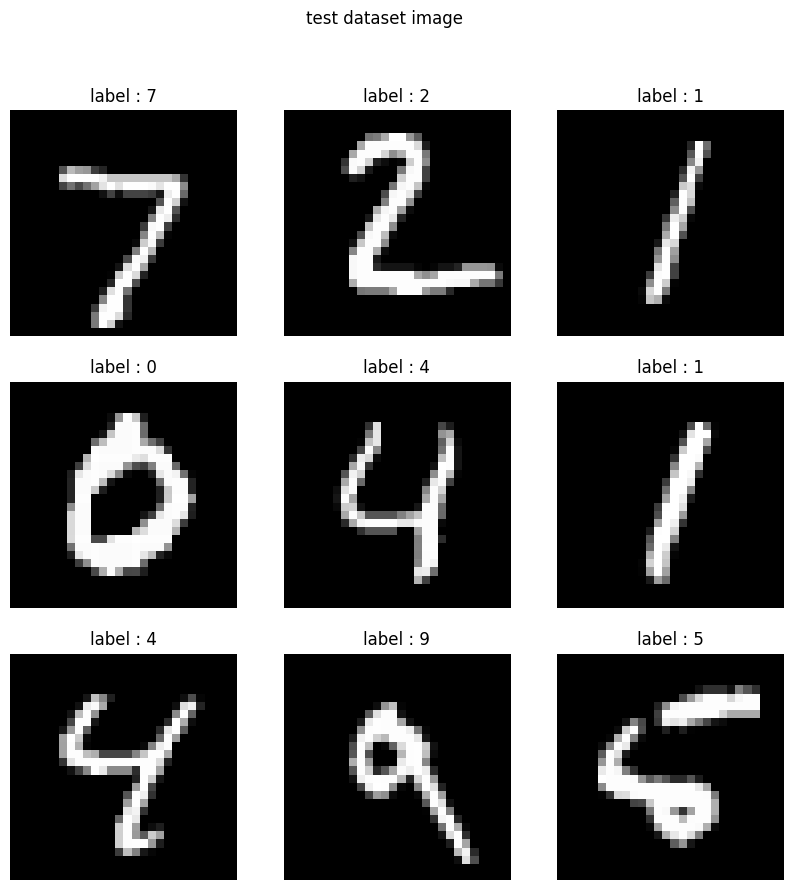

In [77]:
print_image(xtrain, xtest, "train dataset image")
print_image(xval, yval, "validation dataset image")
print_image(xtest, ytest, "test dataset image")

In [75]:
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 2, batch_size = 4)



Epoch 1/2
  772/12500 ━━━━━━━━━━━━━━━━━━━━ 1:49 9ms/step - accuracy: 0.9926 - loss: 0.0217

KeyboardInterrupt: 

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def generate_augment_image(x, y, size = 100):
    datagen = ImageDataGenerator(
        rotation_range = 15,
        height_shift_range = 0.12,
        width_shift_range = 0.13,
        shear_range = 0.10
        zoom_range = 0.11
    )
    aug_x = []
    aug_y = []
    for batchx, batchy in datagen.flow(x,y):
        for a in batchx:
            aug_x.append(a)
        for a in batchy:
            aug_y.append(a)

        if len(aug_x) > size:
            break
    aug_x = np.array(aug_x)
    aug_y = np.array(aug_y)

    print_image(aug_x, aug_y)
    x = np.concatenate((x, aug_x))
    y = np.concatenate((y, aug_y))

    return x, y

def get_augment_dataset():
    (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
    xtrain = xtrain.astype('float32') / 255.0
    xtest = xtest.astype('float32') / 255.0
    xtrain = xtrain.reshape(xtrain.shape[0], 28,28,1)
    xtest = xtest.reshape(xtest.shape[0], 28,28,1)
        
    ytrain = to_categorical(ytrain)
    ytest = to_categorical(ytest)
    
    xtrain , xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.166666, random_state = 42)

    xtrain , ytrain = generate_augment_image(xtrain, ytrain, 10000)
    
    xval , yval = generate_augment_image(xval, yval, 1000)
    xtest , ytest = generate_augment_image(xtest, ytest, 1000)

    return (xtrain, ytrain), (xtest, ytest), (xval, yval)
    
    
    
    

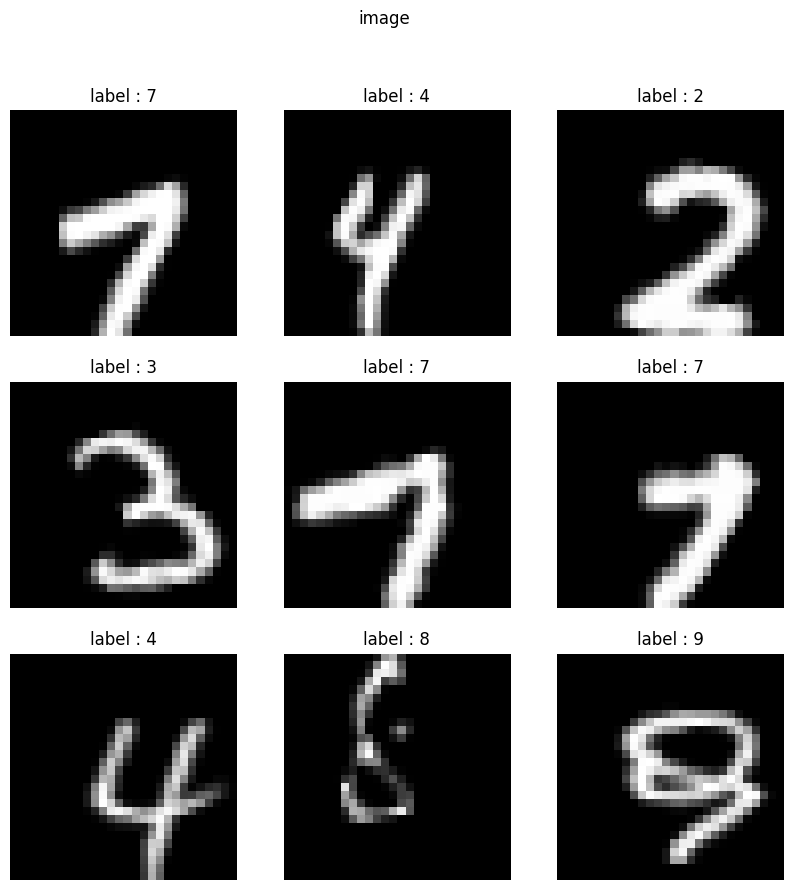

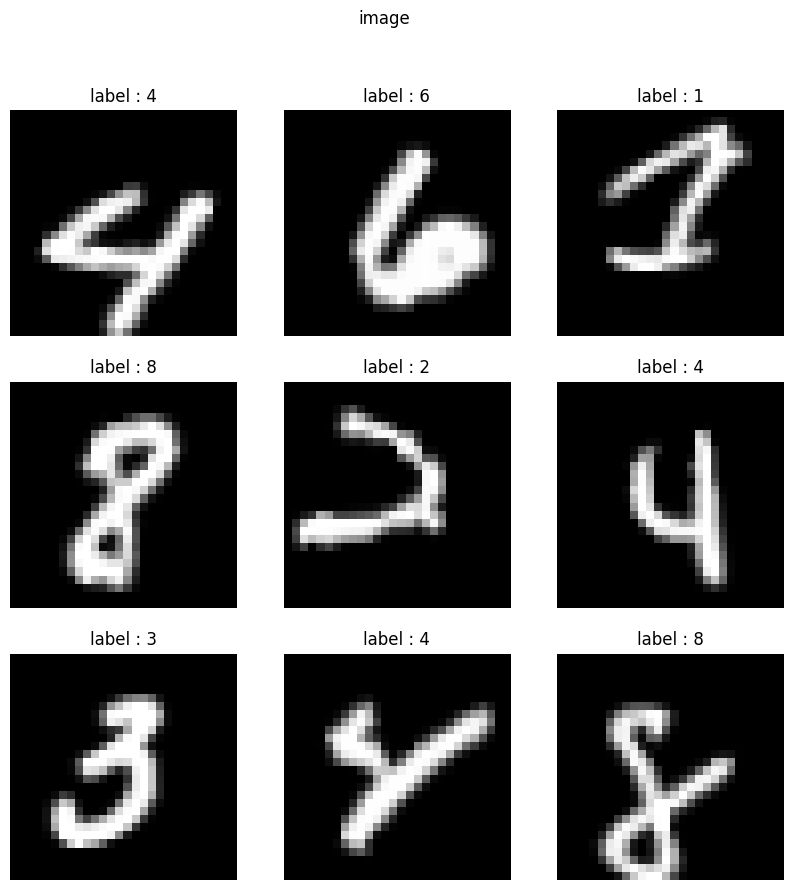

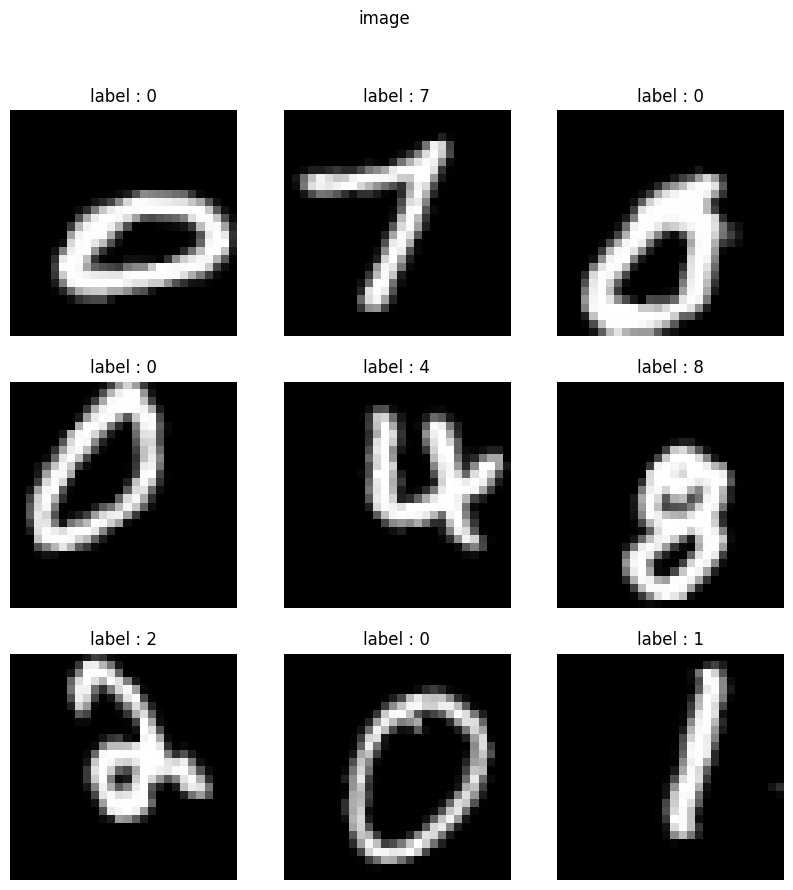

In [72]:
(augx,augy), (augtestx, augtesty), (augvalx, augvaly) = get_augment_dataset()

In [51]:
aug_model = get_model()
aug_history = aug_model.fit(augx, augy, validation_data = (augvalx, augvaly), epochs = 2, batch_size = 4)


Epoch 1/2
15004/15004 ━━━━━━━━━━━━━━━━━━━━ 155s 10ms/step - accuracy: 0.9106 - loss: 0.2788 - val_accuracy: 0.9788 - val_loss: 0.0654
Epoch 2/2
15004/15004 ━━━━━━━━━━━━━━━━━━━━ 152s 10ms/step - accuracy: 0.9803 - loss: 0.0616 - val_accuracy: 0.9857 - val_loss: 0.0540


In [52]:
model.evaluate(xtest,ytest)
model.evaluate(augtestx,augtesty)
aug_model.evaluate(xtest,ytest)
aug_model.evaluate(augtestx, augtesty)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9842 - loss: 0.0478
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9834 - loss: 0.0511
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9847 - loss: 0.0431
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9848 - loss: 0.0432


[0.0479096919298172, 0.9850326776504517]

In [53]:
import pandas as pd
df = pd.DataFrame([['model', 'normal dataset', 'augment dataset'], ['normal model' ,model.evaluate(xtest,ytest)[1] , model.evaluate(augtestx,augtesty)[1]], ['augmented model' ,aug_model.evaluate(xtest,ytest)[1]
,aug_model.evaluate(augtestx, augtesty)[1]]])
df

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9842 - loss: 0.0478
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9834 - loss: 0.0511
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9847 - loss: 0.0431
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9848 - loss: 0.0432


,0,1,2
0,model,normal dataset,augment dataset
1,normal model,0.987,0.967888
2,augmented model,0.9888,0.985033


In [54]:
# (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
# print(xtrain.shape)

(60000, 28, 28)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9832 - loss: 0.0495
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9827 - loss: 0.0519
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9847 - loss: 0.0431
345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9849 - loss: 0.0428


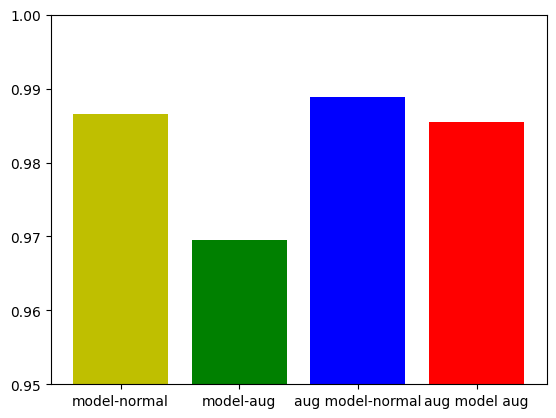

In [85]:
plt.bar(["model-normal","model-aug", "aug model-normal", "aug model aug"],[model.evaluate(xtest,ytest)[1] , model.evaluate(augtestx,augtesty)[1], aug_model.evaluate(xtest,ytest)[1]
,aug_model.evaluate(augtestx, augtesty)[1]], color = ['y', 'g', 'b', 'r'])
plt.ylim(0.95, 1)
plt.show()

In [ ]:
predy = model.predict(xtest)
pred_aug_y = aug_model.predict(xtest)

print('original y     predicted y     augmented y')
print('==========     ===========     ===========')
for i in range(10):
  print(np.argmax(ytest[i]),'\t\t', np.argmax(predy[i]), '\t\t', np.argmax(pred_aug_y[i]))